## Web Crawing
- 웹 페이지에서 데이터를 수집하는 방법에 대해서 학습

### 웹크롤링 방법

#### 웹페이지의 종류
- 정적인 페이지 : 웹 브라우져에 화면이 한번 뜨면 이벤트에 의한 화면의 변경이 없는 페이지 
- 동적인 페이지 : 웹 브라우져에 화면이 뜨고 이벤트가 발생하면 서버에서 데이터를 가져와 화면을 변경하는 페이지    
- 셀리니움 : 크롬 브라우져를 통해 자동화 코드 py 으로 데이터 수집

#### requests 이용
- 받아오는 문자열에 따라 두가지 방법으로 구분
    - json 문자열로 받아서 파싱하는 방법 : 주로 동적 페이지 크롤링할때 사용 -> list, dict -> DataFrame
    - html 문자열로 받아서 파싱하는 방법 : 주로 정적 페이지 크롤링할때 사용 -> Beautifulsoup (SS Selector) -> text     
        
#### selenium 이용
- 브라우져를 직접 열어서 데이터를 받는 방법

#### 크롤링 방법에 따른 속도
- requests json > requests html > selenium

### Crwaling Naver Stock Data
- 네이버 증권 사이트에서 주가 데이터 수집
- 수집할 데이터 : 일별 kospi, kosdaq 주가, 일별 환율(exchange rate) 데이터
- 데이터 수집 절차
    - 웹서비스 분석 : 크롬 개발자도구로 네트워크 트래픽 알아야함.URL
    - 서버에 데이터 요청 : request(url) > response : json(str)
    - 서버에서 받은 데이터 파싱(데이터 형태를 변경) : json(str) > list, dict > DataFrame

In [1]:
import warnings
warnings.filterwarnings('ignore')
import requests
import pandas as pd

#### 1. 웹서비스 분석 : url
- pc 웹페이지가 복잡하면 mobile 웹페이지에서 수집

In [3]:
page, pageSize = 1, 20 # 60 이상이면, Error 발생
url = f'https://m.stock.naver.com/api/index/KOSPI/price?pageSize={pageSize}&page={page}'
print(url)

https://m.stock.naver.com/api/index/KOSPI/price?pageSize=20&page=1


#### 2. 서버에 데이터 요청 : request(url) > response : json(str)
- response의 status code가 200이 나오는지 확인
- 403이나 500이 나오면 request가 잘못되거나 web server에서 수집이 안되도록 설정이 된것임
    - header 설정 또는 selenium 사용
- 200이 나오더라도 response 안에 있는 내용을 확인 > 확인하는 방법 : response.text

In [4]:
response = requests.get(url)
response

<Response [200]>

In [6]:
response.text[:500]

'[{"localTradedAt":"2023-08-24","closePrice":"2,531.30","compareToPreviousClosePrice":"25.80","compareToPreviousPrice":{"code":"2","text":"상승","name":"RISING"},"fluctuationsRatio":"1.03","openPrice":"2,531.78","highPrice":"2,533.84","lowPrice":"2,520.73"},{"localTradedAt":"2023-08-23","closePrice":"2,505.50","compareToPreviousClosePrice":"-10.24","compareToPreviousPrice":{"code":"5","text":"하락","name":"FALLING"},"fluctuationsRatio":"-0.41","openPrice":"2,510.00","highPrice":"2,517.51","lowPrice":'

#### 3. 서버에서 받은 데이터 파싱(데이터 형태를 변경) : json(str) > list, dict > DataFrame

In [10]:
# type(response.json()) ## list
data = response.json()

In [12]:
kospi = pd.DataFrame(data)[['localTradedAt', 'closePrice' ]]
kospi

,localTradedAt,closePrice
0,2023-08-24,"2,531.30"
1,2023-08-23,"2,505.50"
2,2023-08-22,"2,515.74"
3,2023-08-21,"2,508.80"
4,2023-08-18,"2,504.50"
5,2023-08-17,"2,519.85"
6,2023-08-16,"2,525.64"
7,2023-08-14,"2,570.87"
8,2023-08-11,"2,591.26"
9,2023-08-10,"2,601.56"


#### 4. 함수로 만들기

In [33]:
# 1. 웹서비스분석 : URL
# 2. request(URL) > response(JSON(str)) 
# 3. JSON(str) > list, dict > DataFrame
def stock_crawling(code='KOSPI', page=1, pagesize=60):
    url = f'https://m.stock.naver.com/api/index/{code}/price?pageSize={pagesize}&page={page}'
    response = requests.get(url)
    return pd.DataFrame(response.json())[['localTradedAt', 'closePrice']]

In [34]:
kospi_df = stock_crawling()
kospi_df.tail(2)

,localTradedAt,closePrice
58,2023-06-01,"2,569.17"
59,2023-05-31,"2,577.12"


In [35]:
kosdaq_df = stock_crawling('KOSDAQ')
kosdaq_df.tail(2)

,localTradedAt,closePrice
58,2023-06-01,863.78
59,2023-05-31,856.94


#### 5. 원달러 환율 데이터 수집 : 실습

쿼리: &page={page} &pageSize={pagesize}

In [27]:
page, pagesize = 1, 60
url = f'https://m.stock.naver.com/front-api/v1/marketIndex/prices?page={page}&category=exchange&reutersCode=FX_USDKRW&pageSize={pagesize}'
print(url)
response = requests.get(url)
rate = pd.DataFrame(response.json()['result'])[['localTradedAt', 'closePrice']]
rate.tail(2)

https://m.stock.naver.com/front-api/v1/marketIndex/prices?page=1&category=exchange&reutersCode=FX_USDKRW&pageSize=60


,localTradedAt,closePrice
58,2023-06-01,"1,320.00"
59,2023-05-31,"1,328.00"


In [36]:
len(kospi_df), len(kosdaq_df), len(rate)

(60, 60, 60)

#### 6. 시각화

수집한 데이터를 통한 분석

##### 1) 가설 1: 코스피와 원달러 환율이 음의 상관관계

환율이 낮으면 달러를 사고, 환율이 높으면 달러를 팔아서 코스피를 산다.

- 데이터 전처리

In [67]:
df = kospi_df.copy()
df.columns=['date','kospi']
df['kospi'] = df['kospi'].apply(lambda data: float(data.replace(',','')))
df['kosdaq'] = kosdaq_df['closePrice'].apply(lambda data: float(data.replace(',','')))
df['usd'] = rate['closePrice'].apply(lambda data: float(data.replace(',','')))
df.dtypes

date       object
kospi     float64
kosdaq    float64
usd       float64
dtype: object

In [68]:
df.tail(3)

,date,kospi,kosdaq,usd
57,2023-06-02,2601.36,868.06,1310.0
58,2023-06-01,2569.17,863.78,1320.0
59,2023-05-31,2577.12,856.94,1328.0


- 시각화

In [69]:
%config InlineBackend.figure_formats = {'png', 'retina'} # 해상도 높이기
import matplotlib.pyplot as plt
import seaborn as sns

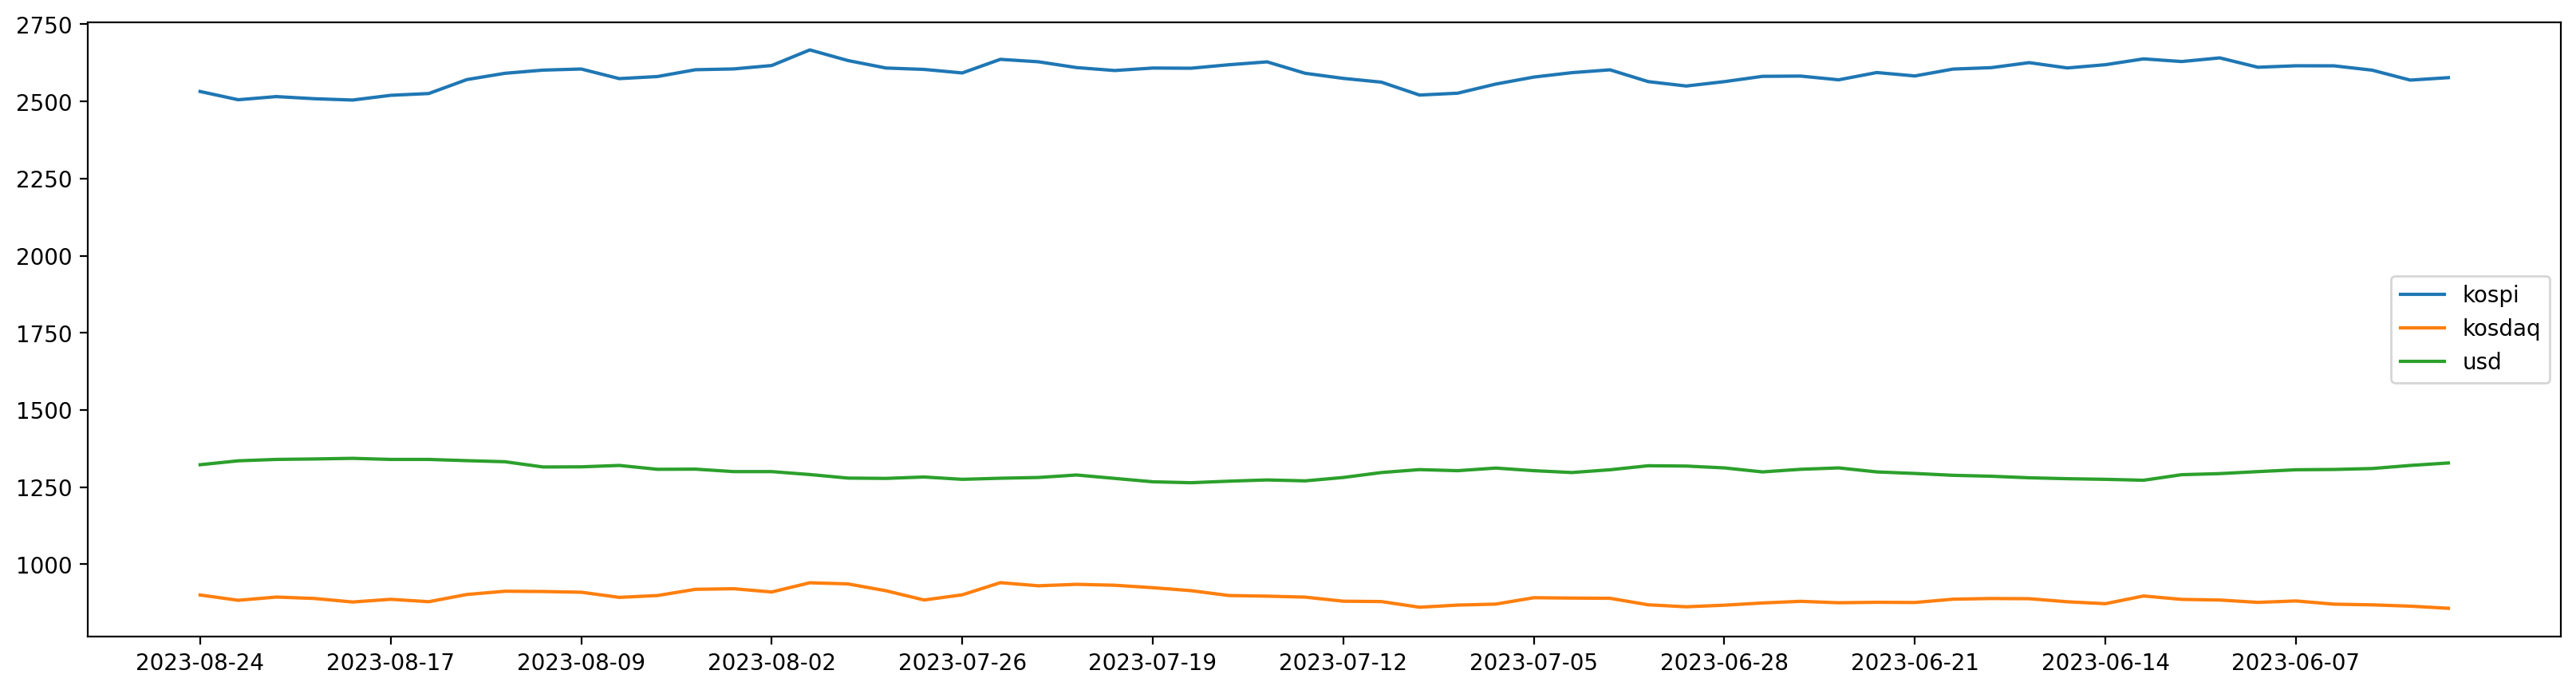

In [72]:
plt.figure(figsize=(20,5))
plt.plot(df['date'], df['kospi'], label='kospi')
plt.plot(df['date'], df['kosdaq'], label='kosdaq')
plt.plot(df['date'], df['usd'], label='usd')
plt.xticks(df['date'][::5])
plt.legend()
plt.show()

#### 7. 데이터 스케일링
- min max scaling


- $z = \frac{x_i - min(x)}{max(x) - min(x)} (0 \leqq z \leqq 1)$


- latex syntax : `https://jjycjnmath.tistory.com/117`

In [73]:
from sklearn.preprocessing import minmax_scale

minmax_scale(df['kospi'])

array([0.17081872, 0.0061512 , 0.06913945, 0.02645014, 0.        ,
       0.09442086, 0.13003629, 0.40825491, 0.5336778 , 0.59703512,
       0.61893338, 0.42738513, 0.46878268, 0.60466261, 0.62059421,
       0.68874946, 1.        , 0.78784524, 0.63861721, 0.61087532,
       0.54044412, 0.81171188, 0.76293289, 0.64747493, 0.58885403,
       0.63812512, 0.63431137, 0.70431199, 0.76151812, 0.53349326,
       0.43193701, 0.35670788, 0.09964938, 0.13661807, 0.31857046,
       0.45826413, 0.54628775, 0.60263271, 0.36771852, 0.28000246,
       0.36716491, 0.47296549, 0.47794796, 0.40351848, 0.54868672,
       0.48059298, 0.61764163, 0.64587562, 0.74607861, 0.63997047,
       0.70480408, 0.82087716, 0.76797687, 0.8406225 , 0.65417974,
       0.68339792, 0.68222919, 0.59580488, 0.39779787, 0.44669988])

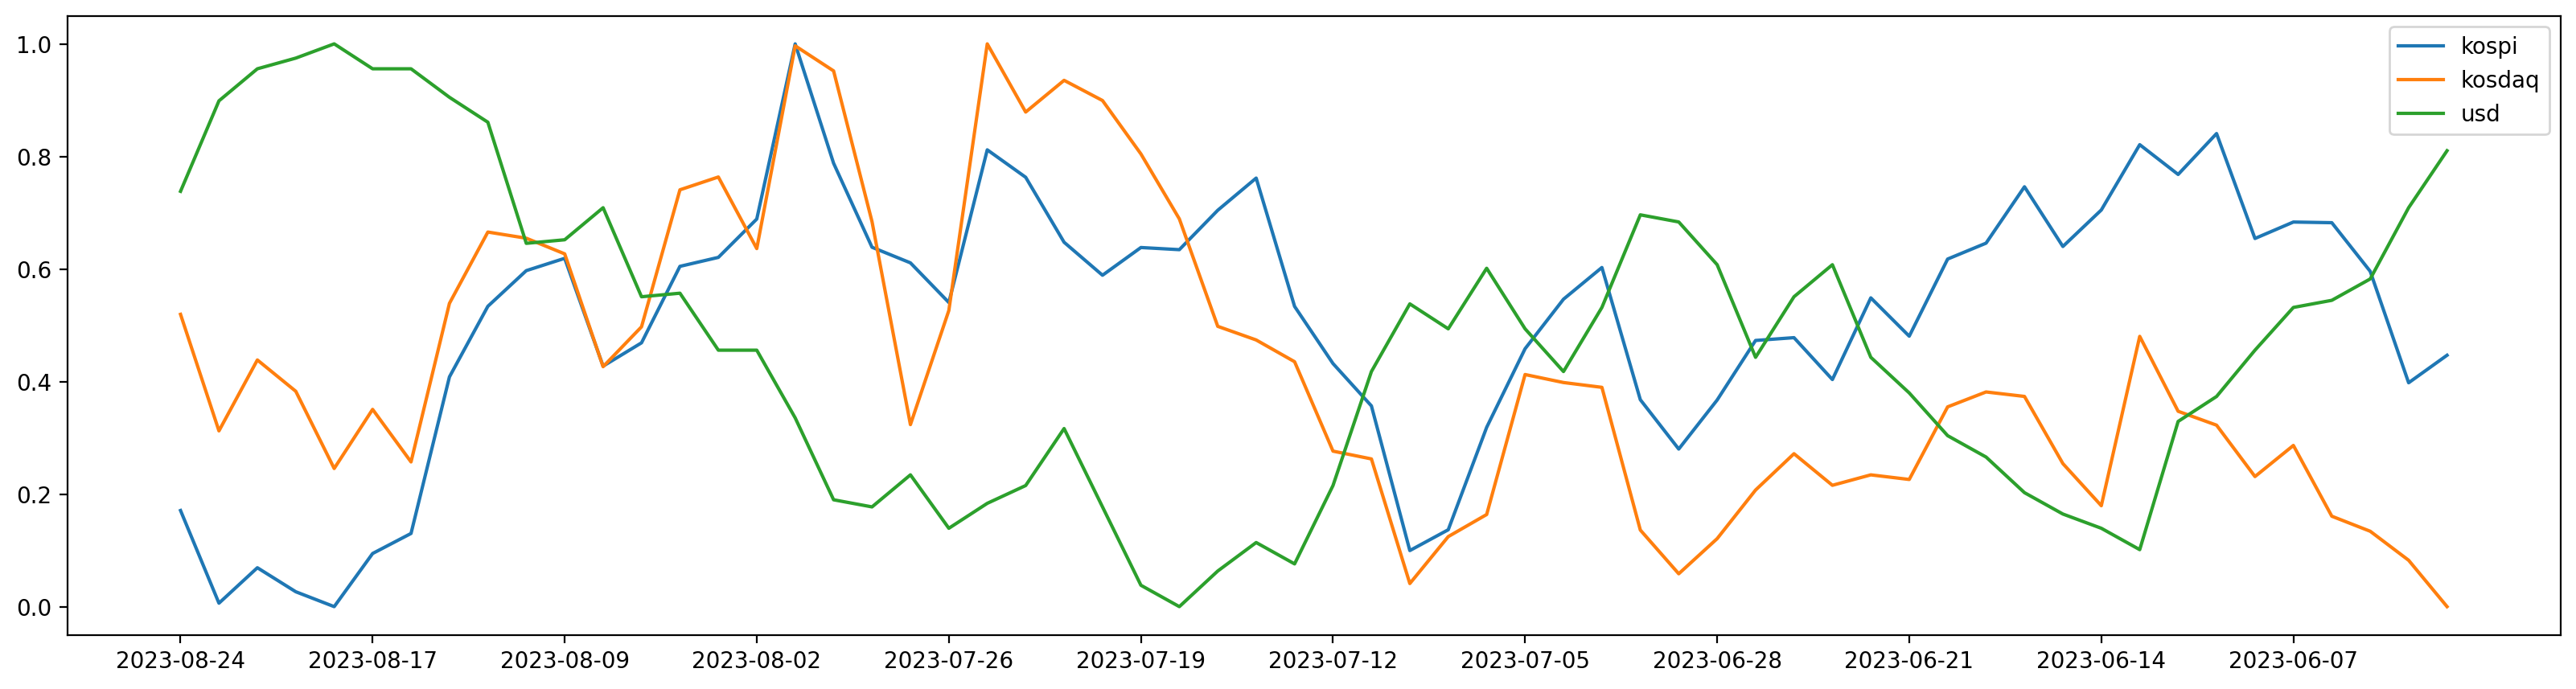

In [75]:
plt.figure(figsize=(20,5))
plt.plot(df['date'], minmax_scale(df['kospi']), label='kospi')
plt.plot(df['date'], minmax_scale(df['kosdaq']), label='kosdaq')
plt.plot(df['date'], minmax_scale(df['usd']), label='usd')
plt.xticks(df['date'][::5])
plt.legend()
plt.show()

#### 8. 상관관계 분석
- 피어슨 상관계수(Pearson Correlation Coefficient)
- 두 데이터 집합의 상관도를 분석할때 사용되는 지표
- 상관계수의 해석
    - -1에 가까울수록 서로 반대방향으로 움직임
    - 1에 가까울수록 서로 같은방향으로 움직임
    - 0에 가까울수록 두 데이터는 관계가 없음

In [83]:
df.corr()

,kospi,kosdaq,usd
kospi,1.000000,0.479690,-0.728399
kosdaq,0.479690,1.000000,-0.357828
usd,-0.728399,-0.357828,1.000000


<Axes: >

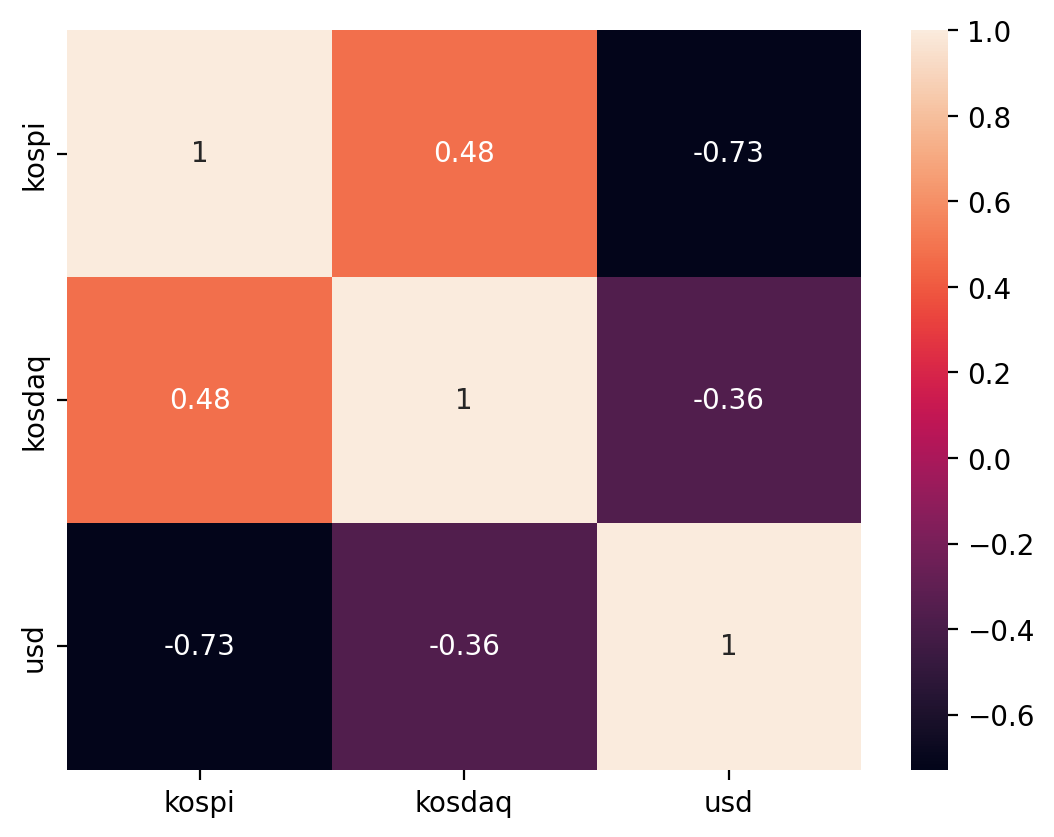

In [87]:
sns.heatmap(df[['kospi', 'kosdaq','usd']].corr(),
           annot = True)

#### (Summary) 데이터분석 

- 계획수립 

- 데이터수집(request) 

- 데이터처리(pandas) 

- 데이터분석(pandas,sklearn) 

-  레포팅, 피드백(matplotlip)